# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [4]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
# Import API key
from api_keys import geoapify_key

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("./../output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,waitangi,-43.9535,-176.5597,12.68,71,64,2.24,NZ,1697432423
1,1,adamstown,-25.0660,-130.1015,21.76,82,72,2.03,PN,1697432424
2,2,albany,42.6001,-73.9662,8.71,85,100,3.81,US,1697432196
3,3,grytviken,-54.2811,-36.5092,0.43,96,100,4.07,GS,1697432424
4,4,holualoa,19.6228,-155.9522,23.21,93,68,0.45,US,1697432425


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

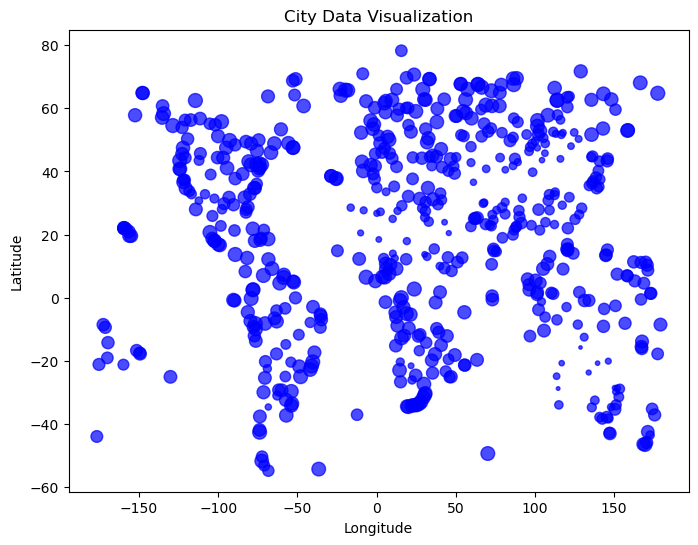

In [6]:
%%capture --no-display

# Configure the map plot
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lng'], city_data_df['Lat'], s=city_data_df['Humidity'], alpha=0.7, c='blue')
plt.title('City Data Visualization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the map
plt.show()

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [43]:
# Narrow down cities that fit criteria and drop any results with null values
criteria_df = city_data_df[ (city_data_df['Humidity'] > 20) & (city_data_df['Country'] == "NZ")]

# Drop any rows with null values
cleaned_df = criteria_df.dropna()

# Display sample data
cleaned_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,waitangi,-43.9535,-176.5597,12.68,71,64,2.24,NZ,1697432423
22,22,dunedin,-45.8742,170.5036,11.00,74,100,2.24,NZ,1697432439
58,58,invercargill,-46.4000,168.3500,10.01,83,99,2.68,NZ,1697432451
62,62,papatowai,-46.5619,169.4708,9.54,93,85,2.78,NZ,1697432453
197,197,greymouth,-42.4667,171.2000,11.51,81,100,4.84,NZ,1697432502
229,229,kerikeri,-35.2268,173.9474,18.22,68,57,3.46,NZ,1697432513
344,344,thames,-37.1333,175.5333,17.04,75,69,3.01,NZ,1697432558
511,511,christchurch,-43.5333,172.6333,18.11,36,20,3.60,NZ,1697432327


### Step 3: Create a new DataFrame called `hotel_df`.

In [44]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
hotel_df = criteria_df[['City', 'Country', 'Lat', 'Lng', 'Humidity']].copy()

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
hotel_df['Hotel Name']=''

# Display sample data
hotel_df

,City,Country,Lat,Lng,Humidity,Hotel Name
0,waitangi,NZ,-43.9535,-176.5597,71,
22,dunedin,NZ,-45.8742,170.5036,74,
58,invercargill,NZ,-46.4000,168.3500,83,
62,papatowai,NZ,-46.5619,169.4708,93,
197,greymouth,NZ,-42.4667,171.2000,81,
229,kerikeri,NZ,-35.2268,173.9474,68,
344,thames,NZ,-37.1333,175.5333,75,
511,christchurch,NZ,-43.5333,172.6333,36,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [ ]:
# Set parameters to search for a hotel

radius = 10000
limit = 10
hotelCategories = "accommodation.hotel"
#hotelByRadiusURl = f"{geoAPIUrl}categories=accommodation.hotel&filter={Lat},{Lng},{radius}&limit=10&apiKey={geoapify_key}"
params = {
   "categories":hotelCategories,
   "limit":limit,
   "apiKey":geoapify_key    
}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    # YOUR CODE HERE
    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params["filter"] = f"filter={row['Lng']},{row['Lat']},{radius}"
    params["bias"] = f"bias=proximity:{row['Lng']},{row['Lat']}"
    
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"

    # Make and API request using the params dictionaty
    hotelResponse = requests.get(base_url, params=params)
    
    # Convert the API response to JSON format
    name_address = hotelResponse.json()
    
    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"
        
    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df

Starting hotel search
waitangi - nearest hotel: No hotel found
dunedin - nearest hotel: No hotel found
invercargill - nearest hotel: No hotel found
papatowai - nearest hotel: No hotel found


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

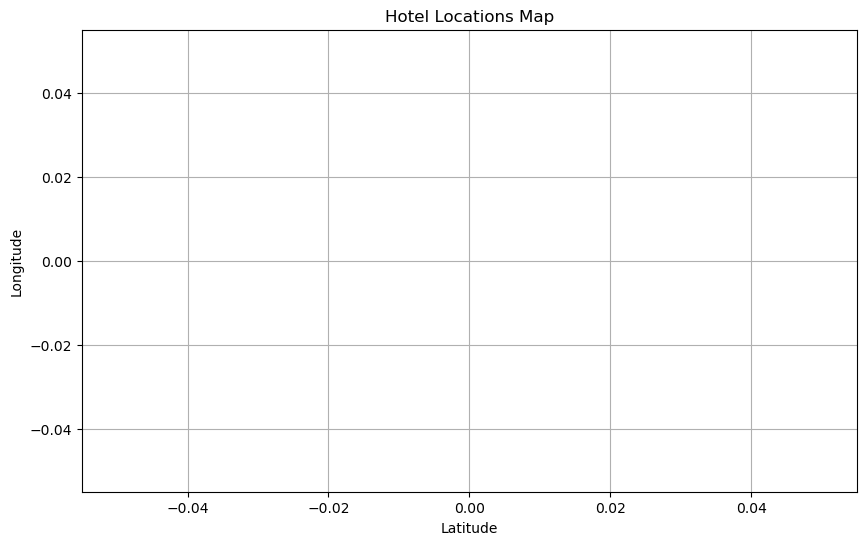

In [54]:
%%capture --no-display

# Configure the map plot
hotelNotFoundCondition= hotel_df['Hotel Name']=='No hotel found'

hotel_found_df = hotel_df[~hotelNotFoundCondition]
hotel_found_df.head()

# Display the map
plt.figure(figsize=(10, 6))
plt.scatter(hotel_found_df['Lat'], hotel_found_df['Lng'], s=hotel_found_df['Humidity']*5, alpha=0.7)

# Add annotations for each point
for i, row in hotel_found_df.iterrows():
    plt.text(row['Lat'], row['Lng'], f"{row['Hotel Name']} ({row['City']}, {row['Country']}, Humidity: {row['Humidity']})")

# Customize the plot
plt.title('Hotel Locations Map')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.grid(True)

# Show the plot
plt.show()